# MNIST VERİ SETİ İLE GÖRÜNTÜ İŞLEME PRATİKLERİ

rakamlar 0-9
grayscale
28x28 piksel resimler
10 sınıf var
Amaç: ANN ile bu resimleri tanımlama ve sınıflandırma


Image Processing:
  - histogram eşitleme(kontrast iyileştirm)
 - gaussian blur (gürültü azaltma)
  - canny (edge detection)

  


In [1]:
!pip install tensorflow matplotlib opencv-python

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Veri yükleme


In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
# (60000,28,28) --> 28 e 28 boyutlu 60 bin görsel var
print(f"x train shape:{x_train.shape}")
# (60000,) --> hepsine ait 1 etiket olduğunu söyler
print(f"y train shape:{y_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x train shape:(60000, 28, 28)
y train shape:(60000,)


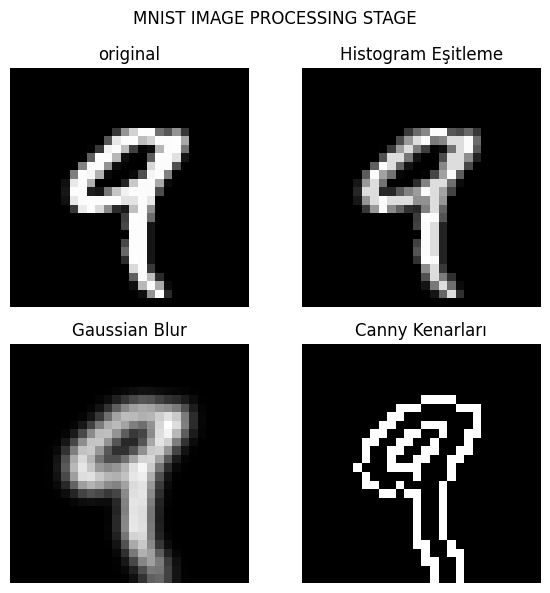

In [11]:
# ilk resim alınır
img = x_train[4]
stages = {"original":img}

#histogram eşitleme(kontrast iyileştirme)
eq = cv2.equalizeHist(img)
stages["Histogram Eşitleme"]=eq

#gaussian blur(gürültü azaltma)
blur = cv2.GaussianBlur(eq,(5,5),0)
stages["Gaussian Blur"]=blur

#canny ile kenar tespit
# 150--> üst eşik değeri gradyan farkı bu değerin üstündeyse kenar kabul edilir
# 50 --> alt eşik değeri gradyan bu değerin altındaysa kesin kenar değildir
# ara değerlerde --> Zayıf kenar adaylarıdır komşuğunda güçlü kenar var ise tutulur
#yoksa atılır.

edges = cv2.Canny(blur,50,150)
stages["Canny Kenarları"] = edges


fig,axes = plt.subplots(2,2,figsize=(6,6))
axes =axes.flat
for ax,(title,im) in zip(axes,stages.items()):
  ax.imshow(im,cmap ="gray")
  ax.set_title(title)
  ax.axis("off")

plt.suptitle("MNIST IMAGE PROCESSING STAGE")
plt.tight_layout()
plt.show()


# Preprocessing Fonksiyonu


In [12]:
def preprocess_image(image):
  # flattering --> 28x28-->784
  #normalization 0-255 --> 0-1
  img_eq = cv2.equalizeHist(image)
  img_blur =cv2.GaussianBlur(img_eq,(5,5),0)
  img_edges = cv2.Canny(img_blur,50,150)
  features = img_edges.flatten()/255.0
  return features


# Train ve Test veri setlerini hazır hale getirme

In [23]:
X_train = np.array([preprocess_image(img) for img in x_train])
y_train_sub = y_train

X_test = np.array([preprocess_image(img) for img in x_test])
y_test_sub = y_test


# ANN Model Kurma

In [24]:
from sys import activate_stack_trampoline
model = Sequential([
    Dense(128,activation="relu",input_shape=(784,)),
    Dropout(0.5),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model  Compile

In [25]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None


# Model Training

In [26]:
history = model.fit(
    X_train,y_train_sub,
    validation_data=(X_test,y_test_sub),
    epochs=10,
    batch_size =32,
    verbose =2
)

Epoch 1/10
1875/1875 - 10s - 5ms/step - accuracy: 0.8044 - loss: 0.6125 - val_accuracy: 0.9134 - val_loss: 0.2849
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.8905 - loss: 0.3521 - val_accuracy: 0.9324 - val_loss: 0.2193
Epoch 3/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9102 - loss: 0.2892 - val_accuracy: 0.9375 - val_loss: 0.2037
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9202 - loss: 0.2532 - val_accuracy: 0.9426 - val_loss: 0.1855
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9276 - loss: 0.2290 - val_accuracy: 0.9470 - val_loss: 0.1717
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9340 - loss: 0.2117 - val_accuracy: 0.9501 - val_loss: 0.1667
Epoch 7/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9371 - loss: 0.1982 - val_accuracy: 0.9515 - val_loss: 0.1659
Epoch 8/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9389 - loss: 0.1884 - val_accuracy: 0.9502 - val_loss: 0.1635
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9430 - loss: 0.1778 - val_accuracy: 0.9539 

# Model Evelaute

In [27]:
test_loss,test_acc = model.evaluate(X_test,y_test_sub)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9491 - loss: 0.1738
Test loss: 0.1602
Test accuracy: 0.9539


# Görselleştirme


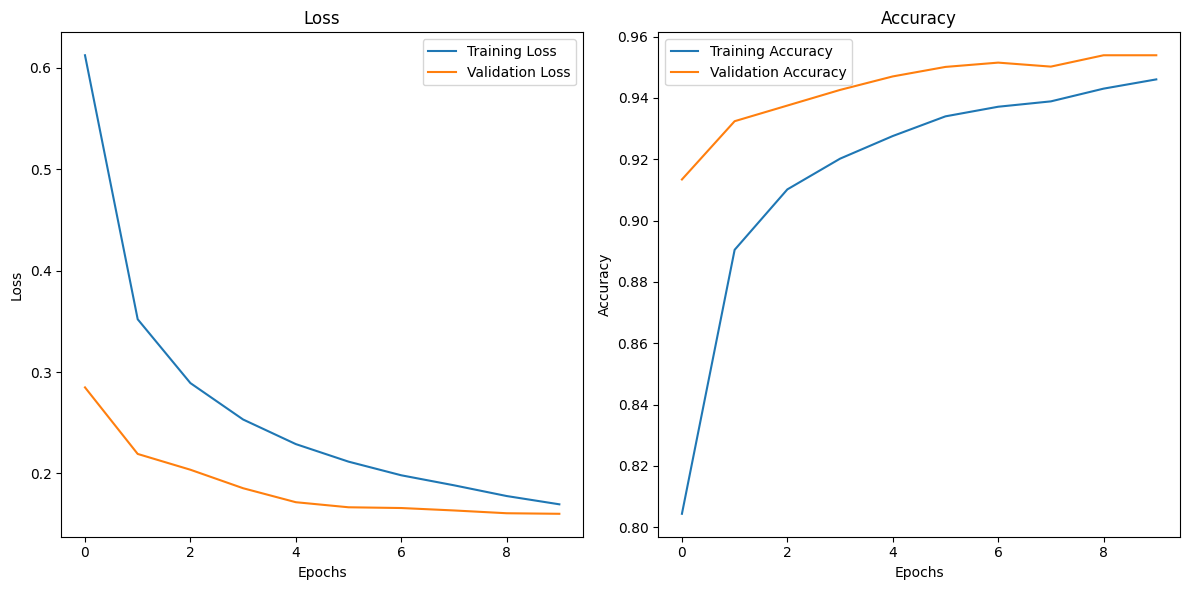

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
